In [1]:
 # Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the course dataset
courses = pd.read_csv("Course_info.csv")

In [3]:
# Importing the comment dataset
comments = pd.read_csv("Comments.csv")

In [4]:
# Checking the rows and columns of the dataset
courses.head(2)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/


In [5]:
# Checking the rows and columns of the dataset
comments.head(2)

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...


In [6]:
# Checking the column types
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [7]:
# Checking the descriptive statistics of numerical columns
courses.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [8]:
# Checking the descriptive statistics of categorical columns
courses.describe(include='O')

,title,headline,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
count,209734,209707,209734,209597,209734,209734,208776,209734,209734,209729,209307
unique,208257,202744,209562,3532,13,130,3818,79,209734,72731,73514
top,Python for Beginners,Curso básico desde 0,2016-08-06T07:33:16Z,2022-10-03,Development,Other IT & Software,Python,English,/course/vegan-vegetarian-cooking-school/,Packt Publishing,/user/packtpublishing/
freq,14,185,4,931,31643,11523,2553,123921,1,1254,1254


In [9]:
# Checking the column types
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411727 entries, 0 to 9411726
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   course_id     int64  
 2   rate          float64
 3   date          object 
 4   display_name  object 
 5   comment       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.8+ MB


In [10]:
# Checking the missing values in the dataset
courses.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [11]:
# Checking the missing values in the dataset
comments.isnull().sum()

id                  0
course_id           0
rate                0
date                0
display_name    75362
comment          6333
dtype: int64

In [12]:
# Checking the duplicates values in the dataset
courses.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [13]:
total_courses = len(courses)

In [14]:
paid_courses = courses[courses['is_paid']==True]
free_courses = courses[courses['is_paid']==False]

In [15]:
total_enrollments = courses['num_subscribers'].sum()
paid_enrollments = paid_courses['num_subscribers'].sum()
free_enrollments = free_courses['num_subscribers'].sum()

In [16]:
print('Total Courses: ', total_courses)
print('Total Enrollments: ', total_enrollments)
print('Total Paid Courses: ', len(paid_courses))
print('Total Free Courses: ', len(free_courses))
print('Total Enrollments in Paid Courses: ', paid_enrollments)
print('Total Enrollments in free Courses: ', free_enrollments)

Total Courses:  209734
Total Enrollments:  649544497.0
Total Paid Courses:  187996
Total Free Courses:  21738
Total Enrollments in Paid Courses:  495318479.0
Total Enrollments in free Courses:  154226018.0


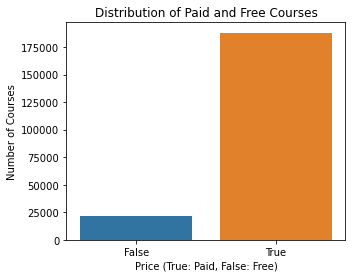

In [17]:
# Distribution of free and paid courses
plt.figure(figsize=(5,4))
sns.countplot(x='is_paid', data=courses)

#ax = sns.countplot(x='is_paid', data=courses)
#for p in ax.patches: ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2. + p.get_height()), ha='center', va='baselaine')

plt.title('Distribution of Paid and Free Courses')
plt.xlabel('Price (True: Paid, False: Free)')
plt.ylabel('Number of Courses')
plt.show()

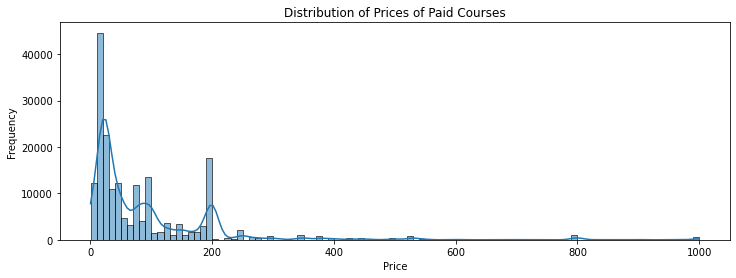

In [18]:
# Price distribution for Paid Courses
plt.figure(figsize=(12,4))
sns.histplot(paid_courses['price'], bins=100, kde=True)
plt.title('Distribution of Prices of Paid Courses')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Courses with Hightest Price
courses[courses['price'] == courses.price.max()][['title','price','instructor_name','language']]

,title,price,instructor_name,language
69,"Oracle Veritabanı Programlama : SQL, PL/SQL, O...",999.99,Cihan Özhan,Turkish
26590,React Native ile iOS ve Android Uygulama Geliş...,999.99,Yasin Ugurlu,Turkish
26599,Sıfırdan Wordpress Tema Yapımı,999.99,Ali Çınaroğlu,Turkish
27917,Go Programlama Dili,999.99,Cihan Özhan,Turkish
28029,"SQL Server Veritabanı Programlama: Temel, Orta...",999.99,Cihan Özhan,Turkish
...,...,...,...,...
196148,كورس معادلة هندسة,999.99,Eng: Tarek Hamed,Arabic
199006,كورس كيف تكتب رواية ـ ورشة كتابة الرواية ـ الم...,999.99,Amir Atef,Arabic
202947,Advance Your Pharmacy Career (Arabic),999.99,Rosette Rafaat,Arabic
203920,Biostatistics For Healthcare Professionals,999.99,Alpha Research Organization,Arabic


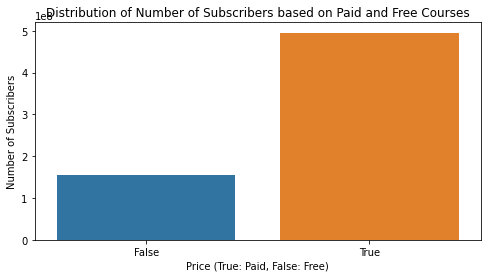

In [20]:
# Distribution of Number of Subscribers based on Paid and Free Courses
plt.figure(figsize=(8,4))
sns.barplot(x= 'is_paid', y='num_subscribers', data= courses, estimator='sum', errorbar=None)

plt.title('Distribution of Number of Subscribers based on Paid and Free Courses')
plt.xlabel('Price (True: Paid, False: Free)')
plt.ylabel('Number of Subscribers')
plt.show()

<Figure size 720x432 with 0 Axes>

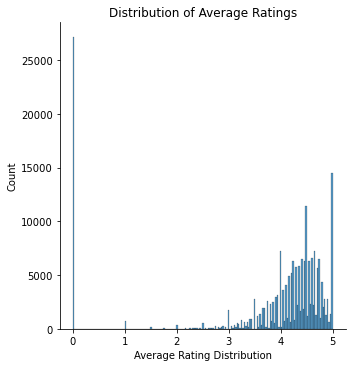

In [21]:
plt.figure(figsize=(10,6))
sns.displot(courses['avg_rating'])
plt.xlabel('Average Rating Distribution')
plt.title('Distribution of Average Ratings')
plt.show()

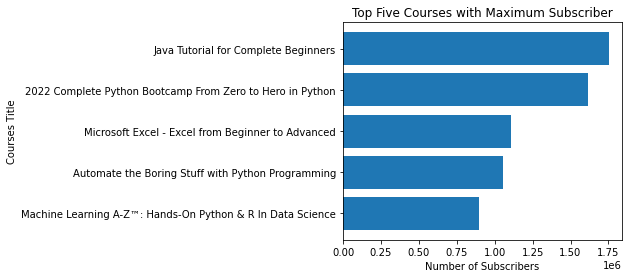

In [22]:
# Top Five Courses with Maximum Subscriber
courses_sorted = courses.sort_values(by = 'num_subscribers', ascending = False)
top_5_courses = courses_sorted.head()

plt.figure(figsize=(5,4))
plt.barh(top_5_courses['title'], top_5_courses['num_subscribers'])
plt.xlabel('Number of Subscribers')
plt.ylabel('Courses Title')
plt.title('Top Five Courses with Maximum Subscriber')
plt.gca().invert_yaxis()
plt.show()

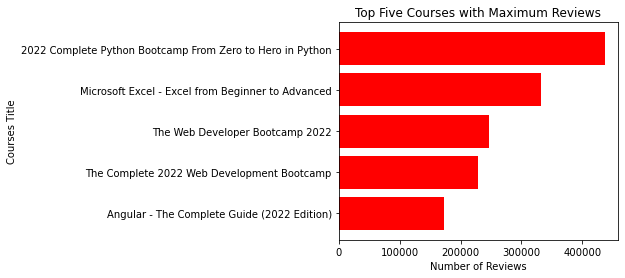

In [23]:
# Top Five Courses with Maximum Reviews
courses_sorted = courses.sort_values(by = 'num_reviews', ascending = False)
top_5_courses = courses_sorted.head()

plt.figure(figsize=(5,4))
plt.barh(top_5_courses['title'], top_5_courses['num_reviews'], color ='red')
plt.xlabel('Number of Reviews')
plt.ylabel('Courses Title')
plt.title('Top Five Courses with Maximum Reviews')
plt.gca().invert_yaxis()
plt.show()

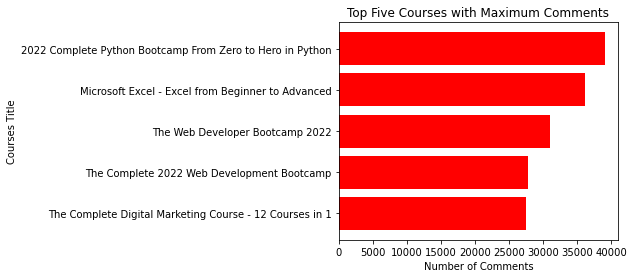

In [24]:
# Top Five Courses with Maximum Comments
courses_sorted = courses.sort_values(by = 'num_comments', ascending = False)
top_5_courses = courses_sorted.head()

plt.figure(figsize=(5,4))
plt.barh(top_5_courses['title'], top_5_courses['num_comments'], color = 'red')
plt.xlabel('Number of Comments')
plt.ylabel('Courses Title')
plt.title('Top Five Courses with Maximum Comments')
plt.gca().invert_yaxis()
plt.show()

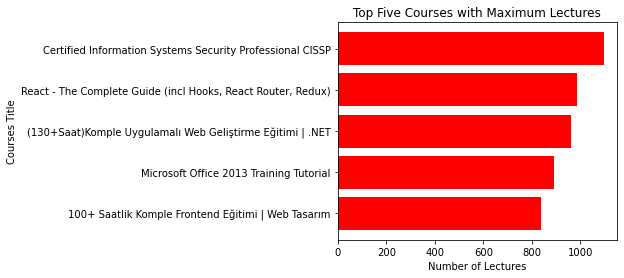

In [25]:
# Top Five Courses with Maximum Lectures
courses_sorted = courses.sort_values(by = 'num_lectures', ascending = False)
top_5_courses = courses_sorted.head()

plt.figure(figsize=(5,4))
plt.barh(top_5_courses['title'], top_5_courses['num_lectures'], color = 'red')
plt.xlabel('Number of Lectures')
plt.ylabel('Courses Title')
plt.title('Top Five Courses with Maximum Lectures')
plt.gca().invert_yaxis()
plt.show()

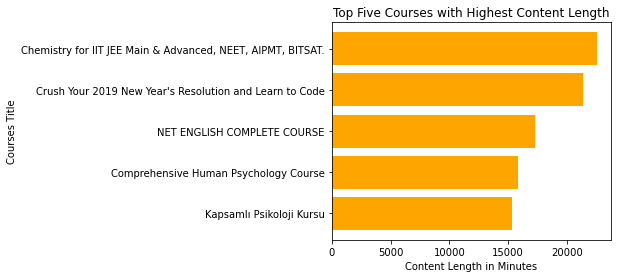

In [26]:
# Top Five Courses with Highest Content Length
courses_sorted = courses.sort_values(by = 'content_length_min', ascending = False)
top_5_courses = courses_sorted.head()

plt.figure(figsize=(5,4))
plt.barh(top_5_courses['title'], top_5_courses['content_length_min'], color = 'orange')
plt.xlabel('Content Length in Minutes')
plt.ylabel('Courses Title')
plt.title('Top Five Courses with Highest Content Length')
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Summary statistics for Average Rating
rating_stats = courses['avg_rating'].describe()
print(rating_stats)

count    209734.000000
mean          3.747179
std           1.533711
min           0.000000
25%           3.800000
50%           4.333334
75%           4.625000
max           5.000000
Name: avg_rating, dtype: float64


In [28]:
courses['avg_rating'].max()

5.0

In [29]:
courses_with_5_rating = courses[courses['avg_rating'] == 5]
courses_with_5_rating.sample(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
131526,3788606.0,Cerámica Didáctica Educacional Empresarial y d...,True,1.00,"Cerámica didáctica, diseño creativo y funciona...",20.0,5.0,3.0,3.0,27.0,112.0,2021-02-02T00:18:00Z,2022-01-21,Teaching & Academics,Other Teaching & Academics,Teacher Training,Spanish,/course/ceramica-didactica-educacional-empresa...,Arturo Juárez Muñoz,/user/arturojurezmuoz/
84264,2781084.0,Все технологии БЕЗ ВЫКРОЙКИ одним пакетом.,True,0.11,"Быстро и просто. Никакой теории, только практи...",182.0,5.0,71.0,19.0,129.0,536.0,2020-01-28T19:35:55Z,2022-07-26,Design,Fashion Design,Sewing,Russian,/course/bolshoibezvikroiki/,Милослава Краснопольская,/user/miloslsvava/
136464,3863636.0,Sıfırdan İleri Seviye Jquery,True,379.99,Jquery,649.0,5.0,6.0,0.0,63.0,684.0,2021-02-24T07:13:50Z,2021-04-04,Development,Web Development,jQuery,Turkish,/course/sifirdan-ileri-seviye-jquery/,Hamit Mızrak,/user/hamit-mizrak/
208781,4891266.0,Le parole che non ti ho detto - edizione BASIC,True,49.99,come comunicare meglio utilizzando le parole g...,14.0,5.0,11.0,11.0,22.0,139.0,2022-09-22T20:13:41Z,2022-09-26,Business,Communication,Real Time Communication,Italian,/course/le-parole-che-non-ti-ho-detto-edizione...,Michele Bresciani,/user/michele-bresciani/
183045,4532580.0,Virtual Real Estate Investing For Beginners,True,64.99,Real Estate Investing Strategies That Can Be U...,2.0,5.0,1.0,1.0,6.0,89.0,2022-02-13T08:18:22Z,2022-02-10,Business,Real Estate,Real Estate Investing,English,/course/fliptowealth-virtualwholesaling/,Chanel Stough,/user/chanel-stough/


In [30]:
print(courses_with_5_rating.shape)

(14392, 20)


In [31]:
courses[courses['avg_rating'] == courses.avg_rating.max()][['title','instructor_name','language']]

,title,instructor_name,language
118,From Startup to Millions Before 30: Part 2,TeleTime Productions,English
128,Two-layered online form validation with jQuery...,Sebastian Sulinski,English
277,Win Them Over with Web Video Part 2,Kamala Appel,English
329,American Accent Training for IT Professionals,Susan Ryan,English
521,Personal SEO : Become a Creative Brand Advocate,Philip Campbell,English
...,...,...,...
209692,Blender to Unreal Engine Become a Dungeon Prop...,3D Tudor,English
209693,AWS Certified Solutions Architect Professional...,ازموس ابراهيم,English
209706,Spiritual Mindfulness,Akshay Yewale,English
209723,Trauma Informed Care for Leadership Crash Course,Best Skills,English


In [32]:
courses['category'].unique()

array(['Lifestyle', 'Business', 'Design', 'Health & Fitness',
       'Finance & Accounting', 'Development', 'Marketing',
       'Teaching & Academics', 'IT & Software', 'Office Productivity',
       'Music', 'Personal Development', 'Photography & Video'],
      dtype=object)

In [33]:
courses['subcategory'].unique()

array(['Food & Beverage', 'Entrepreneurship', 'Other Lifestyle',
       'Pet Care & Training', 'Web Design', 'Yoga', 'Investing & Trading',
       'Programming Languages', 'Media', 'Search Engine Optimization',
       'Teacher Training', 'Mobile Development', 'IT Certifications',
       'Web Development', 'Software Development Tools', 'Design Tools',
       'Science', 'General Health', 'Communication', 'Microsoft',
       'Digital Marketing', 'Language Learning', 'Dance', 'Hardware',
       'Marketing Fundamentals', 'Database Design & Development', 'Sales',
       'Business Analytics & Intelligence', 'Game Development', 'Google',
       'Industry', 'Humanities', 'Oracle', 'Content Marketing',
       'Social Media Marketing', 'Other Teaching & Academics',
       'Social Science', 'Operations', 'Instruments', 'Business Strategy',
       'Career Development', 'Arts & Crafts', 'Parenting & Relationships',
       'Other Business', 'Management', 'Home Improvement & Gardening',
       'Person

In [34]:
categories_counts = courses['category'].value_counts()
print("Course Categories Distribution: ", categories_counts)

# Add a pie plot

Course Categories Distribution:  Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64


In [35]:
subcategories_counts = courses.groupby(['category','subcategory']).size()
subcategories_counts

# Add a pie plot

category              subcategory                      
Business              Business Analytics & Intelligence    1760
                      Business Law                          365
                      Business Strategy                    1588
                      Communication                        1970
                      E-Commerce                           2172
                                                           ... 
Teaching & Academics  Other Teaching & Academics           2164
                      Science                              2096
                      Social Science                        979
                      Teacher Training                     1532
                      Test Prep                            2345
Length: 130, dtype: int64

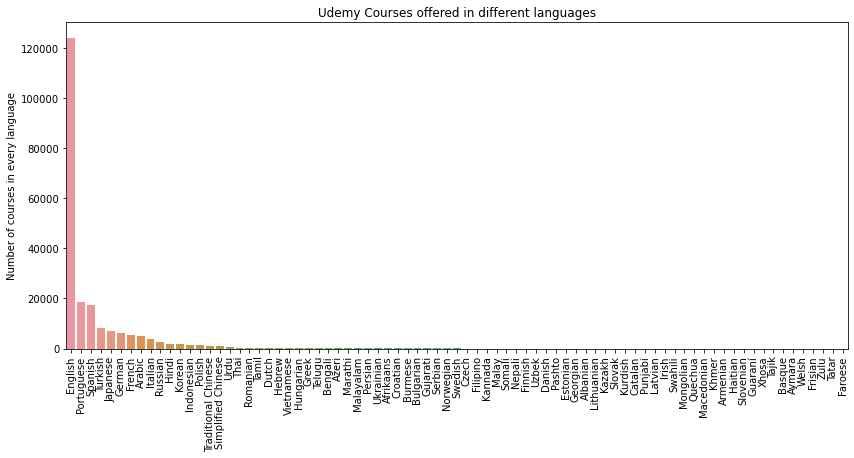

In [36]:
# Count plot for the number of courses in different langauges
plt.figure(figsize=(14, 6))
sns.countplot(data=courses, x='language', order=courses['language'].value_counts().index)
plt.xlabel("")
plt.ylabel("Number of courses in every language")
plt.title("Udemy Courses offered in different languages")
plt.xticks(rotation=90);

In [37]:
courses.language.value_counts()

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
               ...  
Welsh              1
Frisian            1
Zulu               1
Tatar              1
Faroese            1
Name: language, Length: 79, dtype: int64

In [38]:
courses.groupby(['language'])[['avg_rating', 'num_reviews', 'num_comments']].agg('mean').style.background_gradient(cmap='Wistia')

,avg_rating,num_reviews,num_comments
language,,,
Afrikaans,2.186806,2.638889,1.138889
Albanian,4.244444,32.222222,4.444444
Arabic,3.627930,64.325957,9.801039
Armenian,0.000000,0.000000,0.000000
Aymara,4.000000,3.000000,0.000000
Azeri,3.876813,26.585366,4.341463
Basque,4.500000,2.000000,1.000000
Bengali,2.795198,33.364706,10.517647
Bulgarian,2.224735,18.481481,1.370370


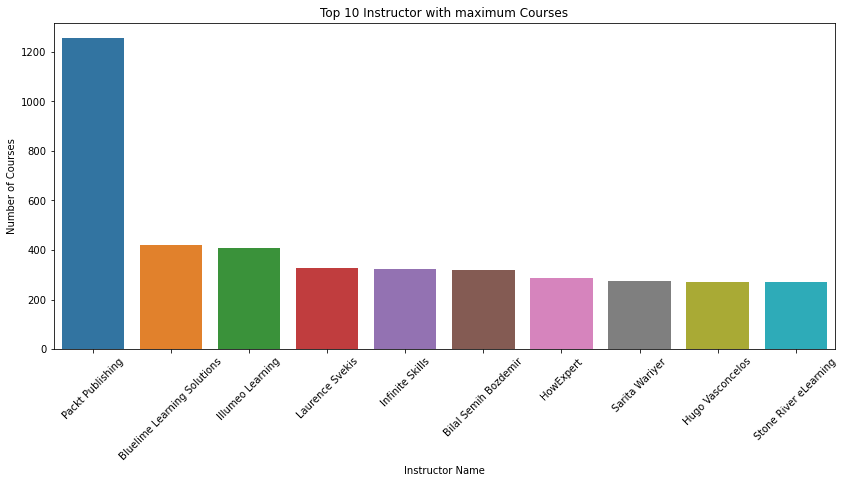

In [39]:
plt.figure(figsize = (14,6))
sns.countplot(x='instructor_name', data = courses,
              order = courses['instructor_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Instructor with maximum Courses')
plt.xlabel('Instructor Name')
plt.ylabel('Number of Courses')
plt.xticks(rotation = 45)
plt.show()

In [40]:
courses['published_time'] = pd.to_datetime(courses['published_time'].str[0:10])
courses['published_year'] = courses['published_time'].dt.year

In [41]:
# Group the year column and perform operations for data visualization
courses_year_count = courses['published_year'].value_counts()

courses_num_subs = courses.groupby('published_year')['num_subscribers'].sum()

courses_num_reviews = courses.groupby('published_year')['num_reviews'].sum()

courses_num_comments = courses.groupby('published_year')['num_comments'].sum()

courses_num_lectures = courses.groupby('published_year')['num_lectures'].sum()

group_courses_year = pd.pivot_table(courses, index='published_year',
                               values=['id', 'num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'],
                               aggfunc={'id': len, 'num_subscribers': np.sum, 'num_reviews':np.sum,
                                        'num_comments':np.sum, 'num_lectures':np.sum})

print('Year-wise count and sum values for different features: \n')
group_courses_year

Year-wise count and sum values for different features: 



,id,num_comments,num_lectures,num_reviews,num_subscribers
published_year,,,,,
2010,4,408.0,68.0,1842.0,33727.0
2011,57,13170.0,4555.0,60041.0,1328159.0
2012,464,71397.0,25592.0,358467.0,7230026.0
2013,1778,233046.0,76847.0,1123207.0,14813615.0
2014,3404,461284.0,140262.0,2192152.0,27642396.0
2015,7102,1113930.0,298958.0,6042455.0,56527397.0
2016,7975,1470159.0,367520.0,7909710.0,68028864.0
2017,12258,1712435.0,561191.0,9486975.0,81376285.0
2018,20653,1568422.0,941243.0,8878711.0,92373156.0


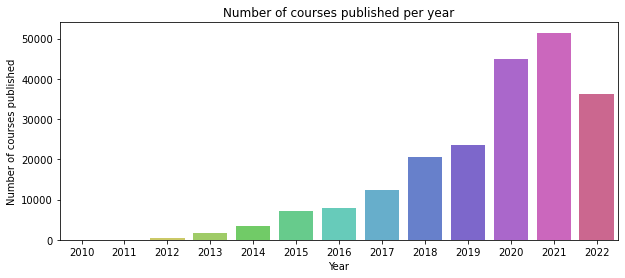

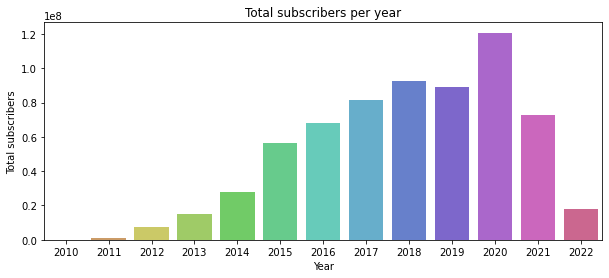

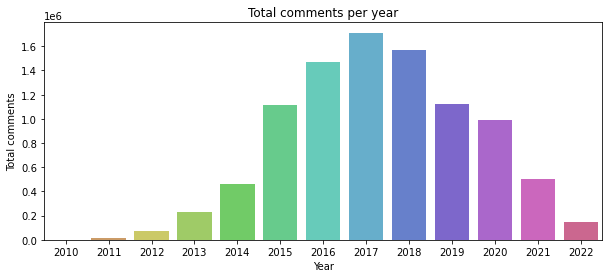

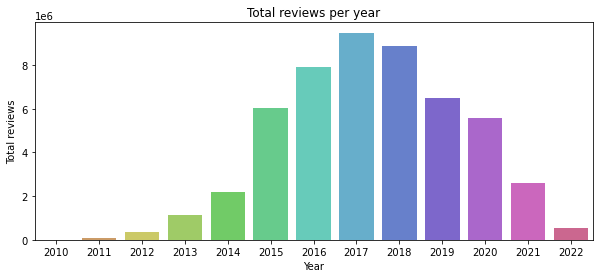

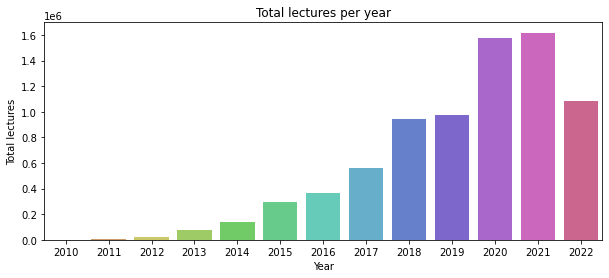

In [42]:
# Visualization of year-wise feature data
dict_cols = dict({'id': 'Number of courses published', 'num_subscribers': 'Total subscribers',
                  'num_comments': 'Total comments', 'num_reviews': 'Total reviews',
                 'num_lectures': 'Total lectures'})

for key, val in dict_cols.items():
    df = group_courses_year
    fig, ax = plt.subplots(figsize=(10,4))
    sns.barplot(data=df, x=df.index, y=df[key], palette='hls')
    ax.set_xlabel("Year")
    ax.set_ylabel(val)
    ax.set_title(f'{val} per year')
    plt.show()

In [43]:
# Dropping rows with any column having NaN.
comments = comments.dropna(axis=0).reset_index(drop=True)

In [44]:
# Mapping the course title from the courses dataframe to comments dataframe
dict_id = dict(zip(courses['id'], courses['title']))
comments['title'] = comments['course_id'].map(dict_id)

In [45]:
# New column 'review' based on 'rate' column.
comments['review'] = pd.cut(comments['rate'], bins=[0, 2.5, 3.0, 5.0], labels=['Negative', 'Neutral', 'Positive'])
comments.sample(5)

,id,course_id,rate,date,display_name,comment,title,review
3936729,4552356,460570,5.0,2016-12-20T01:13:58-08:00,Abdalmajid,"I loved this course, very useful and help me a...",Android Material Design Slidenerd Style,Positive
6745254,110559268,1265410,5.0,2022-03-27T22:37:09-07:00,Shashikumar S,good,Postman: The Complete Guide - REST API Testing,Positive
899168,117177336,3170526,4.0,2022-06-24T09:49:48-07:00,Matthew,very informative,Candlesticks Trading Masterclass with TRREE Tr...,Positive
3026049,101189772,4386168,5.0,2021-11-27T03:46:28-08:00,Aslı,güzel hazırlanmış ve öğretici bir kurs. progra...,Python ile Sıfırdan Programlamaya Giriş,Positive
2065381,47277984,631764,5.0,2020-03-14T04:05:32-07:00,Lashel,"So far so good. Definitely, exceeding my expec...",Motivation Coaching Certification GRCMC Motiva...,Positive


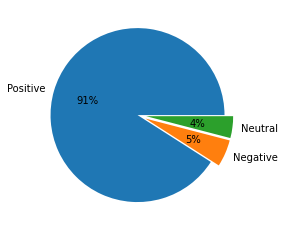


Number of Positive, Negative and Neutral Reviews:
Positive    8485901
Negative     467323
Neutral      377619
Name: review, dtype: int64


In [46]:
# Share of positive and negative reviews
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.0f}%'.format(pct, v=val)
        return my_format

reviews_counts = comments['review'].value_counts()
explode= [0,0.1,0.1]
plt.pie(reviews_counts,labels = reviews_counts.index, explode=explode, autopct=autopct_format(reviews_counts))
plt.show()
print(f"\nNumber of Positive, Negative and Neutral Reviews:\n{reviews_counts}")

## POPULARITY BASED COURSE RECOMMENDER SYSTEM

In [47]:
# Dropping rows with any columns having Nan
courses = courses.dropna(axis=0).reset_index(drop=True)

In [48]:
# Filering courses for 4.5 and above ratings
popular_courses = courses.loc[courses['avg_rating']>=4.5]

In [49]:
# Filtering with english language courses
languages_to_keep = ['English']
popular_courses = popular_courses.loc[popular_courses['language'].isin(languages_to_keep)].reset_index()

In [50]:
popular_50_courses = popular_courses.sort_values('num_subscribers', ascending=False).head(50)

In [51]:
popular_50_courses = popular_50_courses[['id', 'title', 'price', 'headline', 'num_subscribers', 'avg_rating', 'content_length_min', 'published_time']]

## CONTENT BASED COURSE RECOMMENDER SYSTEM

In [52]:
popular_courses['title'].head(10)

0                                 How to Train a Puppy
1             14-Day Yoga Detox and Empowerment Course
2    CCNP SWITCH 300-115 Video Boot Camp With Chris...
3    CCNP ROUTE 2018 Free Video Boot Camp:  BGP Suc...
4                     Speak Up! Stand Out and be HAPPY
5              Microsoft Excel 2010: Advanced Training
6    Programming Java for Beginners - The Ultimate ...
7    Practical Transformation Using XSLT and XPath ...
8                            Learn to Program with C++
9                      Adobe Flash CS5.5 for Beginners
Name: title, dtype: object

In [53]:
popular_courses['tags'] = popular_courses['title'] + ' ' + popular_courses['headline'] + ' ' + popular_courses['instructor_name'] + ' ' + popular_courses['topic']

In [54]:
popular_courses = popular_courses.head(30000)

In [55]:
new_df = popular_courses[['id', 'title', 'tags']]
new_df.sample(10)

,id,title,tags
12493,2066889.0,Fourier and Laplace Transforms,Fourier and Laplace Transforms The Mathematics...
17291,2731840.0,Facebook (Live) For (Beginners): Fast Track Tr...,Facebook (Live) For (Beginners): Fast Track Tr...
2843,595196.0,SDLC and Gating for Testing Professionals,SDLC and Gating for Testing Professionals Expl...
15293,2479420.0,Create an eCommerce Site With No Inventory Usi...,Create an eCommerce Site With No Inventory Usi...
10789,1787830.0,"Rejection: Prevention, Therapy and Personal...","Rejection: Prevention, Therapy and Personal..."
2133,477634.0,Adobe Illustrator CC - Print Design for Beginners,Adobe Illustrator CC - Print Design for Beginn...
10410,1725034.0,"ROS For Beginners (ROS Noetic, Melodic, Kinetic)","ROS For Beginners (ROS Noetic, Melodic, Kineti..."
14310,2352502.0,Maintaining Your Energy as a Psychic Medium,Maintaining Your Energy as a Psychic Medium Su...
6994,1269254.0,MBA in a Box: Business Lessons from a CEO,MBA in a Box: Business Lessons from a CEO A Co...
16695,2654722.0,The Visual System and Concussion,The Visual System and Concussion Understanding...


In [56]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

In [57]:
ps = PorterStemmer()

In [58]:
def stem(tags):
  text = []

  for i in tags.split():
    text.append(ps.stem(i))

  return " ".join(text)

In [59]:
new_df['tags'] = new_df['tags'].apply(stem)

In [70]:
cv = CountVectorizer(max_features=1000, stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()

In [71]:
vectors.shape

(30000, 1000)

In [72]:
cv.get_feature_names_out()

array(['000', '10', '100', '101', '11', '12', '14', '15', '19', '20',
       '200', '2013', '2016', '2018', '2019', '2020', '2021', '2022',
       '21', '2d', '30', '300', '360', '365', '3d', '50', '70', '900',
       'ableton', 'absolut', 'academ', 'academi', 'access', 'account',
       'accredit', 'ace', 'achiev', 'acryl', 'act', 'action', 'activ',
       'ad', 'add', 'administr', 'adob', 'advanc', 'advanced', 'advertis',
       'affili', 'affin', 'age', 'agil', 'ahm', 'ai', 'alcohol', 'alex',
       'algebra', 'algorithm', 'ali', 'amaz', 'amazon', 'american',
       'analysi', 'analysis', 'analyst', 'analyt', 'analyz', 'ancient',
       'andrew', 'android', 'angel', 'angular', 'ani', 'anim', 'answer',
       'anxieti', 'anyon', 'apach', 'api', 'app', 'appli', 'applic',
       'approach', 'arab', 'architect', 'architectur', 'arduino', 'art',
       'artifici', 'artist', 'asp', 'asset', 'associ', 'astrolog',
       'attract', 'audienc', 'audio', 'audit', 'authent', 'author',
       'a

In [73]:
similarity = cosine_similarity(vectors)

In [82]:
def recommend(course):
  course_index = new_df[new_df['title'] == course].index[0]
  distances = similarity[course_index]
  course_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x: x[1])[1:7]

  for i in course_list:
    print(new_df.iloc[i[0]].title)

In [83]:
recommend('python')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [85]:
new_df[new_df['title'] == 'Fourier and Laplace Transforms'].index[0]

12493